In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve

In [2]:
bikes = pd.read_csv('./Bike-Sharing-Dataset/hour.csv')
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
bikes = bikes.drop(columns = ['casual', 'registered', 'dteday'])


In [4]:
X = bikes.iloc[:, :-1]
y = bikes['cnt']

In [5]:
X  = np.array(X.values.tolist())

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
parameters = {'kernel':['poly','rbf'], 'C':[1,10,100,1000,10000]}
model = SVR()
clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'C': 10000, 'kernel': 'rbf'}

In [55]:
# Import Necessary Packages
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline

from sklearn.svm import SVR
# Define and Fit your Model
regr = make_pipeline(SVR(C=1.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#mean_squared_log_error(y_pred, y_test, squared = False)
r2_score(y_pred,y_test)

-13.434852163408655

In [56]:
regr = make_pipeline(SVR(C=10.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#mean_squared_log_error(y_pred, y_test, squared = False)
r2_score(y_pred,y_test)

-11.349793408615817

In [57]:
regr = make_pipeline(SVR(C=100.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#mean_squared_log_error(y_pred, y_test, squared = False)
r2_score(y_pred,y_test)

-7.5411755491352235

In [58]:
regr = make_pipeline(SVR(C=1000.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#mean_squared_log_error(y_pred, y_test, squared = False)
r2_score(y_pred,y_test)

-6.099877112147535

In [59]:
regr = make_pipeline(SVR(C=10000.0))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#mean_squared_log_error(y_pred, y_test, squared = False)
r2_score(y_pred,y_test)

-4.822333508509943

In [85]:
C = [1,10,100,1000,10000]
RMSLE = [1.4620396513511242, 1.451500368440332, 1.4426435494902465, 1.4194836104478976, 1.2952644338519277]
R2 = [-13.434852163408655, -11.349793408615817, -7.5411755491352235, -6.099877112147535, -4.822333508509943]

,RMSLE,R2
C,,
1,1.462040,-13.434852
10,1.451500,-11.349793
100,1.442644,-7.541176
1000,1.419484,-6.099877
10000,1.295264,-4.822334


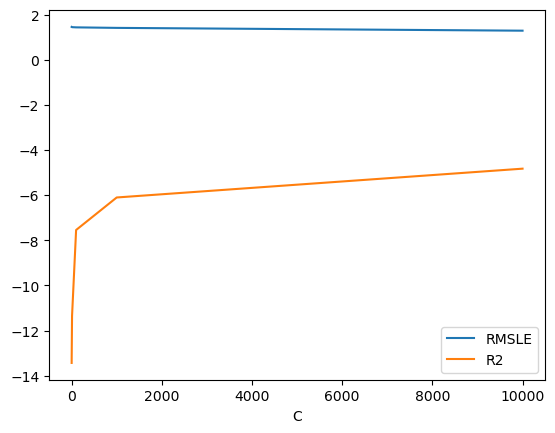

In [86]:
data = list(zip(C,RMSLE,R2))
df = pd.DataFrame(data)
df.columns = ['C','RMSLE','R2']
df = df.set_index('C')
df.plot(kind = 'line')
df

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(date, temperature)
ax2.plot(date, price);

Text(0, 0.5, 'R2')

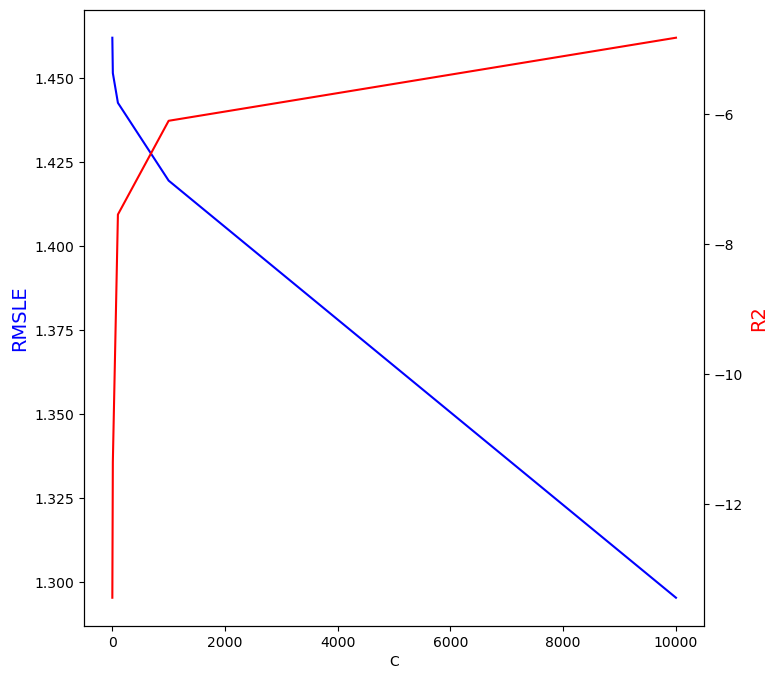

In [106]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(C, RMSLE, color = "blue")
ax2.plot(C, R2, color = "red")
ax1.set_xlabel("C")
ax1.set_ylabel("RMSLE", color="blue", fontsize=14)
ax2.set_ylabel("R2", color="red", fontsize=14)